Instalando libs:

In [1]:
%pip install bokeh_sampledata

In [2]:
%pip install pandas

Libs necessárias:

In [3]:
from bokeh.sampledata.iris import flowers as data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Criando dataframe:

In [4]:
df = pd.DataFrame(data)

## **Inspeção Inicial**

##### **Verificando as primeiras 5 linhas:**

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### **Dimensões do dataFrame (quantidade de linhas e colunas)**

In [6]:
rows, columns = df.shape
print(f'O dataset possui {rows} linhas e {columns} colunas')

O dataset possui 150 linhas e 5 colunas


##### **Mostrando os tipos de dados de cada coluna**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### O dataset possui 4 variáveis numéricas contínuas (float64) e uma variável categórica nominal (object)

##### **Resumo das principais estatísticas do dataframe**.

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Validação dos dados**

##### **Verificando existência de valores nulos e duplicados:**

In [9]:
#Calculando percentual de valores nulos
percentual_valores_nulos = ((df.isnull().sum()/rows)*100).round(2)

# Calculando registros duplicados
num_duplicatas = df.duplicated().sum()


print(f"Percentual de valores nulos por coluna: \n\n{percentual_valores_nulos}")
print("\n" + "="*60 + "\n")

print(f"Número de linhas duplicadas encontradas: {num_duplicatas}")

Percentual de valores nulos por coluna: 

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64


Número de linhas duplicadas encontradas: 1


O dataset não possui registros nulos, mas possui apenas 1 (um) registro duplicado.

##### **Verificando a frequência absoluta das por espécie:**

In [10]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


###### **Verificando a frequência relativa das espécies:**

In [11]:
df['species'].value_counts(normalize=True) * 100

,proportion
species,
setosa,33.333333
versicolor,33.333333
virginica,33.333333


## **Análise de variáveis**

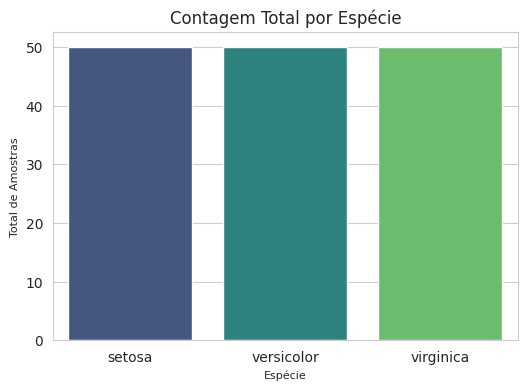

In [12]:
# Definindo um estilo visual para os gráficos
sns.set_style("whitegrid")

# Criando a figura e os eixos para o gráfico
plt.figure(figsize=(6, 4))

# Criando o gráfico de barras verticais
sns.countplot(x='species', data=df, palette='viridis', hue='species')

# Adicionando título e rótulos aos eixos
plt.title('Contagem Total por Espécie', fontsize=12)
plt.xlabel('Espécie', fontsize=8)
plt.ylabel('Total de Amostras', fontsize=8)

# Exibindo o gráfico
plt.show()

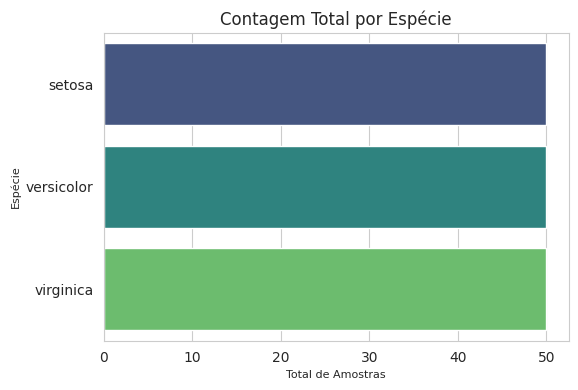

In [13]:
# Definindo um estilo visual para os gráficos
sns.set_style("whitegrid")

# Criando a figura e os eixos para o gráfico
plt.figure(figsize=(6, 4))

# Criando o gráfico de barras horizontais
sns.countplot(y='species', data=df, palette='viridis', hue='species', legend=False)

# Adicionando título e rótulos aos eixos
plt.title('Contagem Total por Espécie', fontsize=12)
plt.xlabel('Total de Amostras', fontsize=8)
plt.ylabel('Espécie', fontsize=8)

# Exibindo o gráfico
plt.show()

##### **Boxplots para análises de variáveis por species**

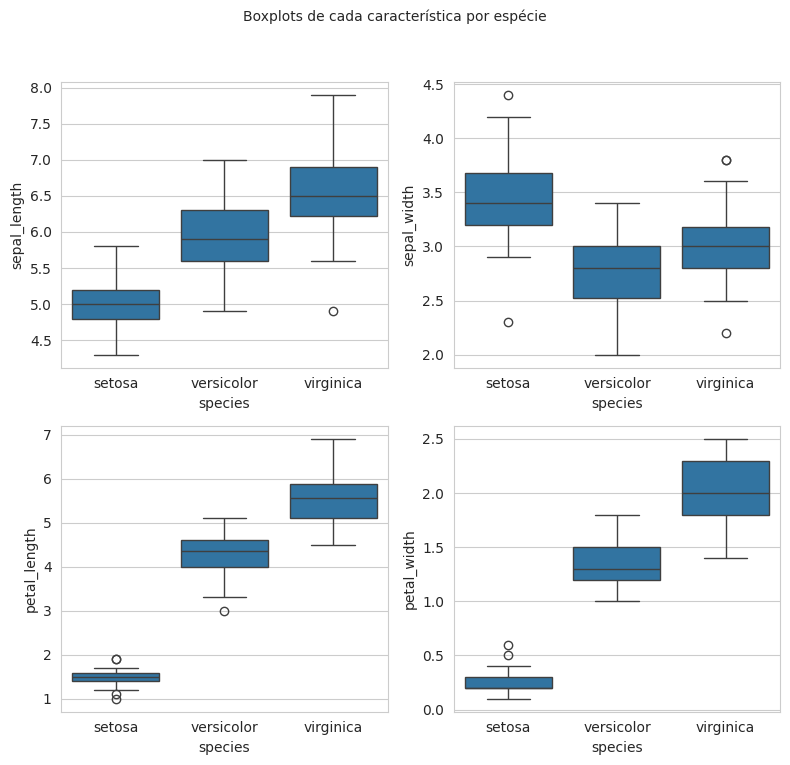

In [14]:
# Criando boxplots para cada variável, por espécie
plt.figure(figsize=(8, 8))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
plt.suptitle("Boxplots de cada característica por espécie", size=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### **Média e mediana agrupadas por espécies.**


In [15]:
# Calculando médias
mean_per_specie = df.groupby('species').mean()

# Calculando medianas
median_per_specie = df.groupby('species').median()

print("Média para características de pétala e sépala \n")
print(mean_per_specie)
print("\n" + "="*50 + "\n")

print("Mediana para características de pétala e sépala \n")
print(median_per_specie)
print("\n" + "="*50 + "\n")


Média para características de pétala e sépala 

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


Mediana para características de pétala e sépala 

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0




##### **Desvio padrão e a variância agrupadas por espécies.**

In [16]:
# Calculando desvios padrão
std_per_specie = df.groupby('species').std()

# Calculando variâncias
variance_per_specie = df.groupby('species').var()

print("Desvio padrão para características de pétala e sépala \n")
print(std_per_specie)
print("\n" + "="*50 + "\n")

print("Variância para características de pétala e sépala \n")
print(variance_per_specie)
print("\n" + "="*50 + "\n")

Desvio padrão para características de pétala e sépala 

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.352490     0.379064      0.173664     0.105386
versicolor      0.516171     0.313798      0.469911     0.197753
virginica       0.635880     0.322497      0.551895     0.274650


Variância para características de pétala e sépala 

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.124249     0.143690      0.030159     0.011106
versicolor      0.266433     0.098469      0.220816     0.039106
virginica       0.404343     0.104004      0.304588     0.075433




### **Análises dos resultados**

###### A baixa existência de outliers e frequências balanceadas entre as  as espécie resultam em uma análise descritiva sem viés. Observa-se uma sobreposição de registros entre as espécies versicolor e virgínica com os boxplots. No entanto, nota-se uma correlação entre `sepal_length`, `petal_length` e `petal_width`, dado o comportamento de progressão positiva entre as medidas de tendência central, e podem diferenciadores mais confiáveis dos grupos.

###### Há diferenciação clara da setosa, pois nenhuma medição de suas características (com excessão da largura da sépala) "invade" os intervalos de medições da versicolor e virgínica. Ou seja, é possível aplicar limiares  para as medidas da pétala para a criação do cluster da setosa sem falsos positivos.

